In [4]:
#import sys
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install opencv-python

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.
'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.
'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


Importing Required Libraries

In [126]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications
import numpy as np
from sklearn.model_selection import train_test_split
import os
import cv2
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Importing Data from 'Train' folder 

In [127]:
# Importing data from the 'Train' Folder
data = r'Train'
# Creating empty list to store filenames
files = []
# Iterating through the data and storing the filenames in the files list
for _, _, files in os.walk(data):
    break
# Printing the total number of images currently being used to train and test the models below
print(f'Total number of files: {len(files)}')


Total number of files: 971


Classifying the images based on the labels in the filename

Something to note, I originally created the array of just size 1 that stored the value of each label in that single spot as 0,1,2 but it resulted in accuracy ratings never changing between epochs and being lower after trying different techniques this is the current attempt that is having the best results, currently values are stored in a numpy array of size 3 where the first value being 1 represents a lower class, the second being 1 represents middle and the third being 1 represents upper class.

What Y looks like
Y = ([[1. 0. 0.], [0. 1. 0.], [0. 0. 1.]])

In [128]:

# Creating a numpy array of zeros the length of the dataset with a size of shape of 3
Y = np.zeros((len(files), 3))

# Loop through the list of filenames
for i, f in enumerate(files):

    # If the filename contains 'lower' set the first value of the array to 1
    if 'lower' in f:
        Y[i, 0] = 1  
    # If the filename contains 'middle' set the second value of the array to 1
    elif 'middle' in f:
        Y[i, 1] = 1  
    # If the filename contains 'upper' set the third value of the array to 1
    elif 'upper' in f:
        Y[i, 2] = 1  

#Create the path to each file 
files = [os.path.join(data, f) for f in files]

#Example showing the path to the file and the coorisponding label showing what we have classified as middle in the numpy array.
print(f'File location: {files[1]}\n Classified as: {Y[1]}')

File location: Train\img1005_middle.jpg
 Classified as: [0. 1. 0.]


# Creating a Sequential model 
This runs for multiple image sizes to determine the accuracy rating based on image size

In [129]:
# List of image sizes
image_size = [(16, 16), (32, 32), (64, 64), (150, 150), (250, 250), (500, 500)]

# Epoch count, currently anything over 5 epochs does not result in any change in the accuracy rating
epochs = 5

# Creating a list to store the image sizes and accuracy ratings for the Sequential Model
conv_accuracy_results = []

# Looping through each image size
for size in image_size:

    # Creating a list of each images numerical values
    X = []

    for file in files:
        img = cv2.imread(file) 
        # Resizing the image based on the specific tuple in image_sizes
        img = cv2.resize(img, size) 
        X.append(img)

    # Scaling the image data down to values between 0 and 1
    X = np.array(X, dtype='float32') / 255

    # Train Test Split to split up the data into training and testing datasets with a current size of 80% training 20% testing data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=38)

    # Creating a Sequential Convolution Neural Network model with 2 layers
    model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (size[0], size[1], 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3,3), activation='relu', input_shape = (size[0], size[1], 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    # Dense layer of size 3 to match the input size of the numpy array Y
    layers.Dense(3, activation='softmax')
    ])

    # Compiling the model utilizing the adam optimizer and categorical crossentropy 
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Fitting the model based on the TrainTestSplit data and epochs set from the value epochs
    model.fit(X_train, Y_train, epochs=epochs, batch_size=64, validation_split=0.2)

    # Evaluating the models accuracy
    test_loss, test_acc = model.evaluate(X_test, Y_test)

    # Appending the accuracy to conv_accuracy_results for later output
    conv_accuracy_results.append((size, test_acc))

# Printing the Accuracy outputs
for size, accuracy in conv_accuracy_results:
        print(f"Image Size: {size}, Accuracy: {accuracy:.3f}")
    

Epoch 1/5


c:\Users\Austi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4090 - loss: 1.0270 - val_accuracy: 0.4551 - val_loss: 0.9998
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4625 - loss: 1.0055 - val_accuracy: 0.4744 - val_loss: 1.0060
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4649 - loss: 1.0092 - val_accuracy: 0.4551 - val_loss: 0.9962
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4965 - loss: 0.9748 - val_accuracy: 0.4936 - val_loss: 0.9956
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4612 - loss: 0.9884 - val_accuracy: 0.5000 - val_loss: 0.9979
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4470 - loss: 1.0227 
Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3797 - loss: 1.0685 - val_accuracy: 0.4231 - val_loss: 1.0148
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4506 - loss: 0.9930 - val_accuracy: 0.4423 - val_loss: 0.9935
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy

# Graphing the Accuracy Ratings
Something to note and look at later, I have ran this multiple times and each output is significantly different, sometimes prefering a smaller image size and sometimes prefering larger.

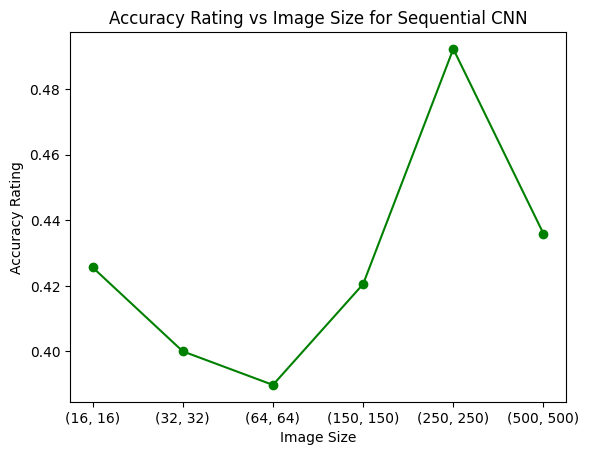

In [132]:
# Converting the image sizes into a string so they can be used for the X axis
sizes = [str(size) for size, _ in conv_accuracy_results]

# Extracting the accuracy only from the seq_accuracy_results 
acc = [accuracy for _, accuracy in conv_accuracy_results]

# Plot showing the accuracy vs image size
plt.plot(sizes, acc, marker='o', color = 'g')
plt.title('Accuracy Rating vs Image Size for Sequential CNN')
plt.xlabel('Image Size')
plt.ylabel('Accuracy Rating')
plt.show()

# Creating the ResNet Model
This runs for multiple image sizes to determine the accuracy rating based on image size

In [138]:
# List of image sizes
image_size = [(32, 32), (64, 64), (150, 150), (250, 250), (500, 500)]

# Epoch count, currently set to 5
epochs = 5

# Creating a list to store the image sizes and accuracy ratings for the ResNet model
resNet_accuracy_results = []

# Looping through each image size
for size in image_size:
    # Creating a list of each images numerical values
    X = []

    for file in files:
        img = cv2.imread(file) 
        # Resizing the image based on the specific tuple in image_sizes
        img = cv2.resize(img, (size[0], size[1]))  
        X.append(img)

    # Scaling the image data down to values between 0 and 1
    X = np.array(X, dtype='float32') / 255.0
    
    # Train Test Split to split up the data into training and testing datasets with a current size of 80% training 20% testing data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=38)

    # Creating a ResNet50V2 model, weights are based off the imagenet dataset and the input shape is set to the image size, currently only doing two layers
    resbase = applications.ResNet50V2(weights = 'imagenet', include_top=False, input_shape= (size[0], size[1], 3))
    # Allows only the new layers to be trainable
    resbase.trainable = False
    # Creating the sequential model utilziing the ResNet model instantiated before and adding more layers to be trained based on the current dataset
    # Currently attempting with only 1 extra layer
    resModel = models.Sequential([
        # Calling the resbase which was assigned to the ResNet model created before
        resbase,

        # Adding our extra layers to be trained
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation= 'relu', input_shape = (size[0], size[1], 3)),
        
        # Dense layer of size 3 to match the input size of the numpy array Y
        layers.Dense(3, activation='softmax')
    ])
    
    # Compiling the model utilizing the adam optimizer and categorical crossentropy 
    resModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Fitting the model based on the TrainTestSplit data and epochs set from the value epochs
    resModel.fit(X_train, Y_train, epochs = epochs, batch_size=64, validation_split=0.2)

    # Evaluating the models accuracy
    test_loss, test_acc = resModel.evaluate(X_test, Y_test)

    # Appending the accuracy to resNet_accuracy_results for later output
    resNet_accuracy_results.append((size, test_acc))

# Printing the Accuracy outputs
for size, accuracy in resNet_accuracy_results:
        print(f"Image Size: {size}, Accuracy: {accuracy:.3f}")

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 242ms/step - accuracy: 0.4029 - loss: 1.0551 - val_accuracy: 0.4295 - val_loss: 1.0062
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5909 - loss: 0.9217 - val_accuracy: 0.5000 - val_loss: 0.9898
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.6641 - loss: 0.8319 - val_accuracy: 0.5000 - val_loss: 0.9866
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.7088 - loss: 0.7633 - val_accuracy: 0.5128 - val_loss: 0.9849
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7318 - loss: 0.7095 - val_accuracy: 0.5128 - val_loss: 0.9888
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4279 - loss: 1.0734
Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 340ms/step - accuracy: 0.4670 - loss: 1.2675 - val_accuracy: 0.5064 - val_loss: 1.2281
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - accuracy: 0.7185 - loss: 0.6651 - val_accuracy: 0.5577 - val_loss: 1.0908
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 188

# Graphing the Accuracy Ratings of the ResNet Model

[]

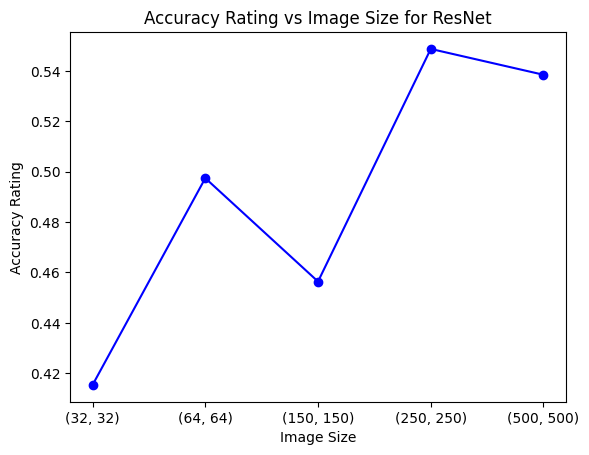

In [139]:
# Converting the image sizes into a string so they can be used for the X axis
sizes = [str(size) for size, _ in resNet_accuracy_results]

# Extracting the accuracy only from the seq_accuracy_results 
acc = [accuracy for _, accuracy in resNet_accuracy_results]

# Plot showing the accuracy vs image size
plt.plot(sizes, acc, marker='o', color = 'b')
plt.title('Accuracy Rating vs Image Size for ResNet')
plt.xlabel('Image Size')
plt.ylabel('Accuracy Rating')
plt.plot()